# 데이터 불러오기

전처리했던 csv 파일로

In [1]:
import pandas as pd

file_path = '../data/Compensation_pre.csv'
data = pd.read_csv(file_path, index_col =0)
data

,지역,학교급,사고자구분,사고자학년,사고자성별,사고시간,사고장소,사고부위,사고형태,사고당시활동,학교급_사고자학년,보상급여
0,전남,고등학교,일반학생,2학년,남,쉬는시간,강당(체육관),골반/엉덩이,그밖의 손상 사고,기타,고등학교 2학년,31900
1,대구,초등학교,일반학생,6학년,여,체육,운동장,두피,그밖의 손상 사고,기타 스포츠 활동,초등학교 6학년,53000
2,경남,고등학교,일반학생,1학년,남,그 밖의 교육활동 시간,기타 교외,기타,그밖의 손상 사고,기타,고등학교 1학년,15027050
3,전북,초등학교,일반학생,5학년,남,쉬는시간,일반(교과)교실,어깨,그밖의 손상 사고,기타,초등학교 5학년,3114900
4,제주,초등학교,일반학생,2학년,남,식사시간(간식 포함),기타 교외,치아,고정된 물체와의 부딪힘,기타,초등학교 2학년,1106500
...,...,...,...,...,...,...,...,...,...,...,...,...
425209,서울,중학교,일반학생,3학년,여,체육,강당(체육관),손가락,고정된 물체와의 부딪힘,피구,중학교 3학년,97200
425210,서울,초등학교,일반학생,5학년,남,체육,강당(체육관),복합부위,사람과의 부딪힘,기타 구기,초등학교 5학년,585950
425211,서울,기타학교,일반학생,3학년,여,현장학습,기타 교외,무릎,넘어짐,"걷기/뛰기, 오르내리기",기타학교 3학년,0
425212,서울,기타학교,일반학생,2학년,여,쉬는시간,계단,어깨,넘어짐,"걷기/뛰기, 오르내리기",기타학교 2학년,284910


# 각 변수별 unique 확인

변수 별 unique 확인을 통해 분석할 방향을 정함
데이터 type 변경을 위함

- 확인 결과, 각 Dtype이 알맞게 배치되어 있음

In [2]:
# 각 변수별 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424177 entries, 0 to 425213
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   지역         424177 non-null  object
 1   학교급        424177 non-null  object
 2   사고자구분      424177 non-null  object
 3   사고자학년      424177 non-null  object
 4   사고자성별      424177 non-null  object
 5   사고시간       424177 non-null  object
 6   사고장소       424177 non-null  object
 7   사고부위       424177 non-null  object
 8   사고형태       424177 non-null  object
 9   사고당시활동     424177 non-null  object
 10  학교급_사고자학년  424177 non-null  object
 11  보상급여       424177 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 42.1+ MB


In [3]:
max(data['보상급여'])

1010000000

# 변수 별 빈도 확인

변수 별 범주 내 발생 빈도 확인

In [4]:
import matplotlib.font_manager as fm

fm.fontManager.__init__()

fonts = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print("설치된 나눔폰트:", fonts)

설치된 나눔폰트: ['NanumBarunpen', 'NanumMyeongjo', 'NanumMyeongjo Eco', 'NanumSquareRound', 'NanumGothicCoding', 'NanumMyeongjo Eco', 'NanumSquare', 'NanumSquare', 'NanumMyeongjo', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumBarunpen', 'NanumBarunGothic', 'NanumGothic Eco', 'NanumGothicCoding', 'NanumSquareRound', 'NanumGothic Eco', 'NanumSquare_ac', 'NanumGothic', 'NanumSquare', 'NanumSquare_ac', 'Nanum Brush Script', 'NanumGothic Eco', 'NanumBarunGothic', 'NanumBarunGothic', 'NanumGothic', 'NanumMyeongjo Eco', 'NanumGothic', 'NanumBarunGothic YetHangul', 'NanumMyeongjo Eco', 'NanumMyeongjo', 'NanumSquareRound', 'NanumBarunGothic', 'NanumSquare', 'NanumGothic', 'NanumMyeongjo YetHangul', 'NanumSquare_ac', 'NanumSquareRound', 'Nanum Pen Script']


In [5]:
eda_summary = []

for col in data.columns:
    top_vals = data[col].value_counts(dropna=False).head(5).to_dict()
    eda_summary.append({
        "Column": col,
        "Dtype": data[col].dtype,
        "Missing": data[col].isna().sum(),
        "Unique": data[col].nunique(dropna=False),
        "Top Values": top_vals
    })

eda_df = pd.DataFrame(eda_summary)
eda_df


,Column,Dtype,Missing,Unique,Top Values
0,지역,object,0,17,"{'경기': 110841, '서울': 63171, '경남': 29905, '부산':..."
1,학교급,object,0,6,"{'초등학교': 155417, '중학교': 145186, '고등학교': 87369,..."
2,사고자구분,object,0,3,"{'일반학생': 410115, '체육특기학생': 10010, '특수학교(학급)학생'..."
3,사고자학년,object,0,7,"{'1학년': 101135, '2학년': 99198, '3학년': 89937, '6..."
4,사고자성별,object,0,2,"{'남': 284871, '여': 139306}"
5,사고시간,object,0,33,"{'체육': 145955, '식사시간(간식 포함)': 68572, '쉬는시간': 6..."
6,사고장소,object,0,48,"{'운동장': 121112, '강당(체육관)': 115839, '일반(교과)교실':..."
7,사고부위,object,0,33,"{'손가락': 79353, '발목': 76005, '복합부위': 42606, '무릎..."
8,사고형태,object,0,29,"{'넘어짐': 135634, '고정된 물체와의 부딪힘': 96341, '스포츠 활동..."
9,사고당시활동,object,0,60,"{'걷기/뛰기, 오르내리기': 65452, '축구': 56011, '장난, 놀이':..."


In [6]:
for i in eda_df['Top Values']:
    print(i)

{'경기': 110841, '서울': 63171, '경남': 29905, '부산': 25321, '인천': 22371}
{'초등학교': 155417, '중학교': 145186, '고등학교': 87369, '유치원': 32996, '특수학교': 1816}
{'일반학생': 410115, '체육특기학생': 10010, '특수학교(학급)학생': 4052}
{'1학년': 101135, '2학년': 99198, '3학년': 89937, '6학년': 40301, '5학년': 33888}
{'남': 284871, '여': 139306}
{'체육': 145955, '식사시간(간식 포함)': 68572, '쉬는시간': 62047, '방과후과정': 18233, '이론수업': 16405}
{'운동장': 121112, '강당(체육관)': 115839, '일반(교과)교실': 59380, '계단': 29417, '복도': 24909}
{'손가락': 79353, '발목': 76005, '복합부위': 42606, '무릎': 26667, '발': 19546}
{'넘어짐': 135634, '고정된 물체와의 부딪힘': 96341, '스포츠 활동 중 충격을 가함': 40135, '움직이는 물체와의 부딪힘': 38819, '사람과의 부딪힘': 34547}
{'걷기/뛰기, 오르내리기': 65452, '축구': 56011, '장난, 놀이': 53415, '농구': 40725, '기타': 33689}
{'중학교 1학년': 51294, '중학교 2학년': 47494, '중학교 3학년': 46398, '초등학교 6학년': 40087, '초등학교 5학년': 33744}
{100000: 458, 44100: 318, 51000: 317, 50000: 292, 44800: 291}


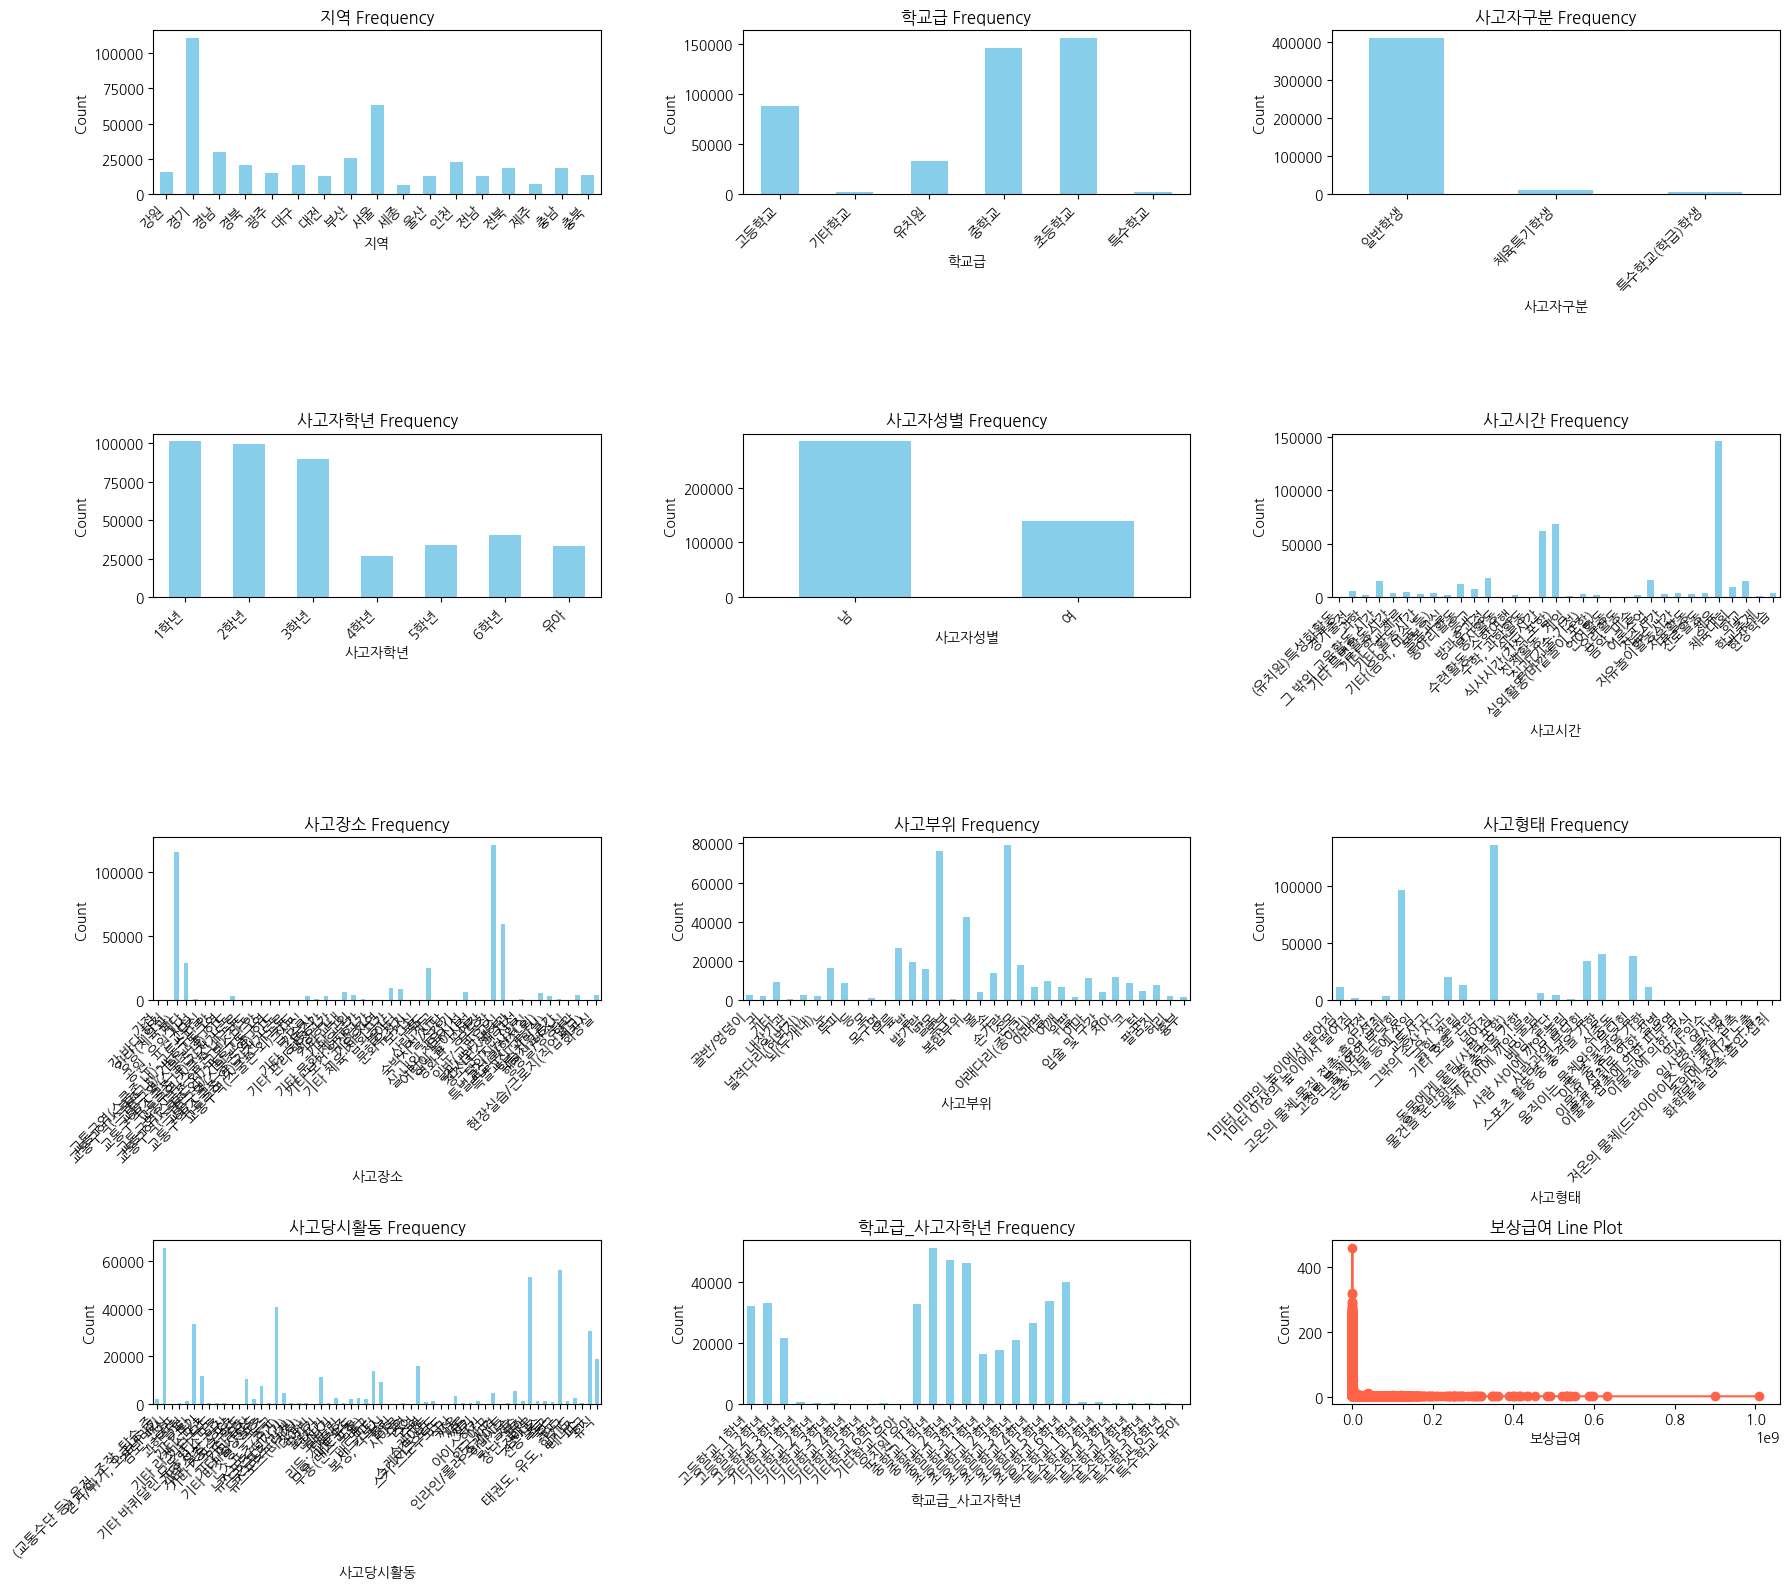

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 변수 구분
categorical_vars = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype.name == 'category']
numeric_vars = [col for col in data.columns if pd.api.types.is_integer_dtype(data[col])]

# 시각화할 전체 변수 리스트
all_vars = categorical_vars + numeric_vars

# 레이아웃 설정
n = len(all_vars)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for idx, var in enumerate(all_vars, 1):
    plt.subplot(n_rows, n_cols, idx)

    if var in categorical_vars:
        # 범주형: 막대그래프
        data[var].value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f'{var} Frequency')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        
    elif var in numeric_vars:
        # 정수형: 선그래프
        counts = data[var].value_counts().sort_index()
        plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='tomato')
        plt.title(f'{var} Line Plot')
        plt.xlabel(var)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()


- 지역: 인구수 자체가 많은 서울, 경기권이 다수
- 학교급_사고자학년: 초등학교 고학년~중학교까지 인원이 많고 고등학교부터 약간 줄어듦
- 성별: 비교적 더 활동적인 남자가 약 2배 더 많음

- 사고 파일 분석과 거의 유사

나머지 범위가 많은 변수들은 따로 확인

In [8]:
def plotting_bar(data, var):
    # 값 개수 및 정렬
    counts = data[var].value_counts().sort_values(ascending=True)  # 오름차순 정렬로 보기 좋게
    total = counts.sum()
    
    # 그래프 크기 크게
    plt.figure(figsize=(12, 8))
    
    # 수평 막대 그래프
    bars = plt.barh(counts.index.astype(str), counts.values, color='skyblue')
    
    # 타이틀 및 축 레이블
    plt.title(f'{var} 빈도 및 비율', fontsize=20)
    plt.xlabel('Count', fontsize=16)
    plt.ylabel(var, fontsize=16)
    
    # 막대 끝에 빈도수 표시
    for bar, count in zip(bars, counts.values):
        width = bar.get_width()
        pct = count / total * 100
        plt.text(width + max(counts.values)*0.01,
                 bar.get_y() + bar.get_height()/2,
                 f'{int(count)} ({pct:.1f}%)',
                 va='center', fontsize=14)

    plt.tight_layout()
    plt.show()

def plotting_hist(data, var, lim1 = None, lim2 = None, bins=50,):
    
    # 그래프 크기 크게
    plt.figure(figsize=(12, 8))
    
    # 히스토그램
    counts, bin_edges, patches = plt.hist(data[var], bins=bins, color='skyblue', edgecolor='black')

    # 타이틀 및 축 레이블
    plt.title(f'{var} 히스토그램', fontsize=20)
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.ylim([lim1, lim2])

    plt.tight_layout()
    plt.show()


### 사고 시간

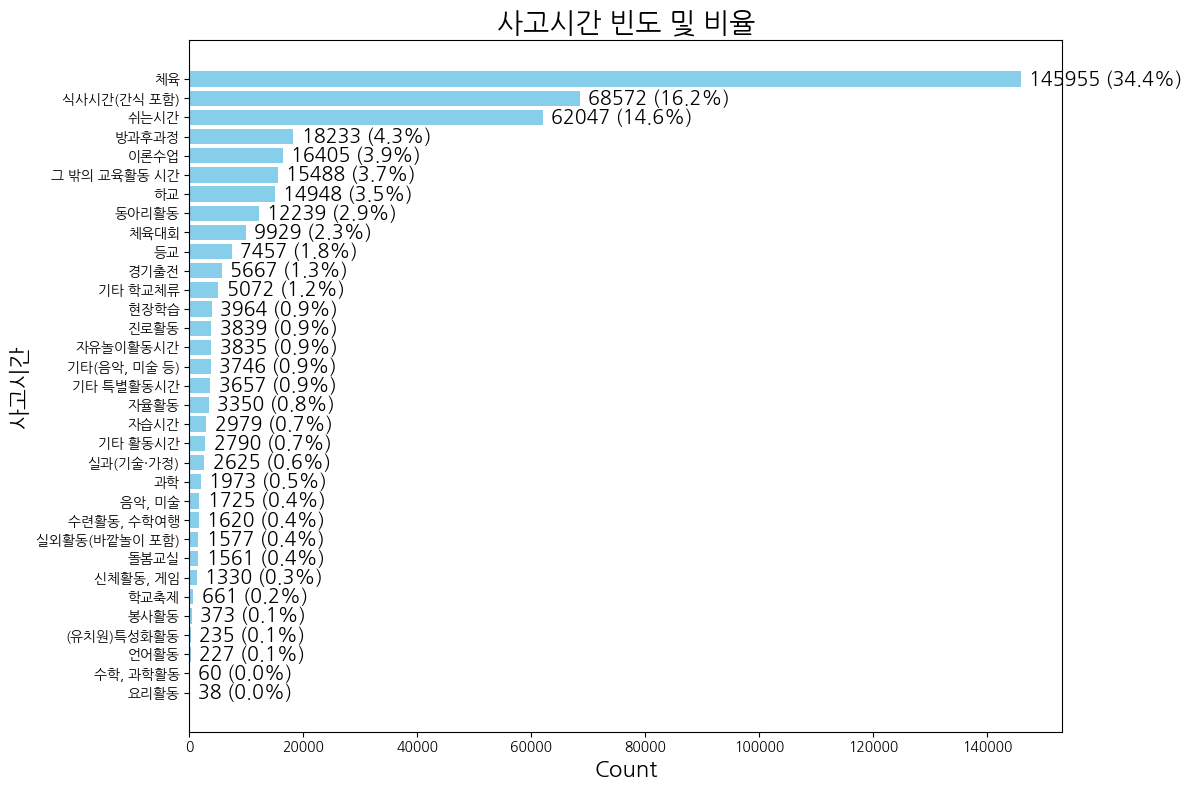

In [9]:
plotting_bar(data, '사고시간')

- 사고시간: 활동량이 많은 체육시간이 1/3 차지. 외에 식사시간(계단과 뛰어다니는 행동), 쉬는시간(수업시간보다 활동이 많음)을 포함하면 65.2% 차지

### 사고장소

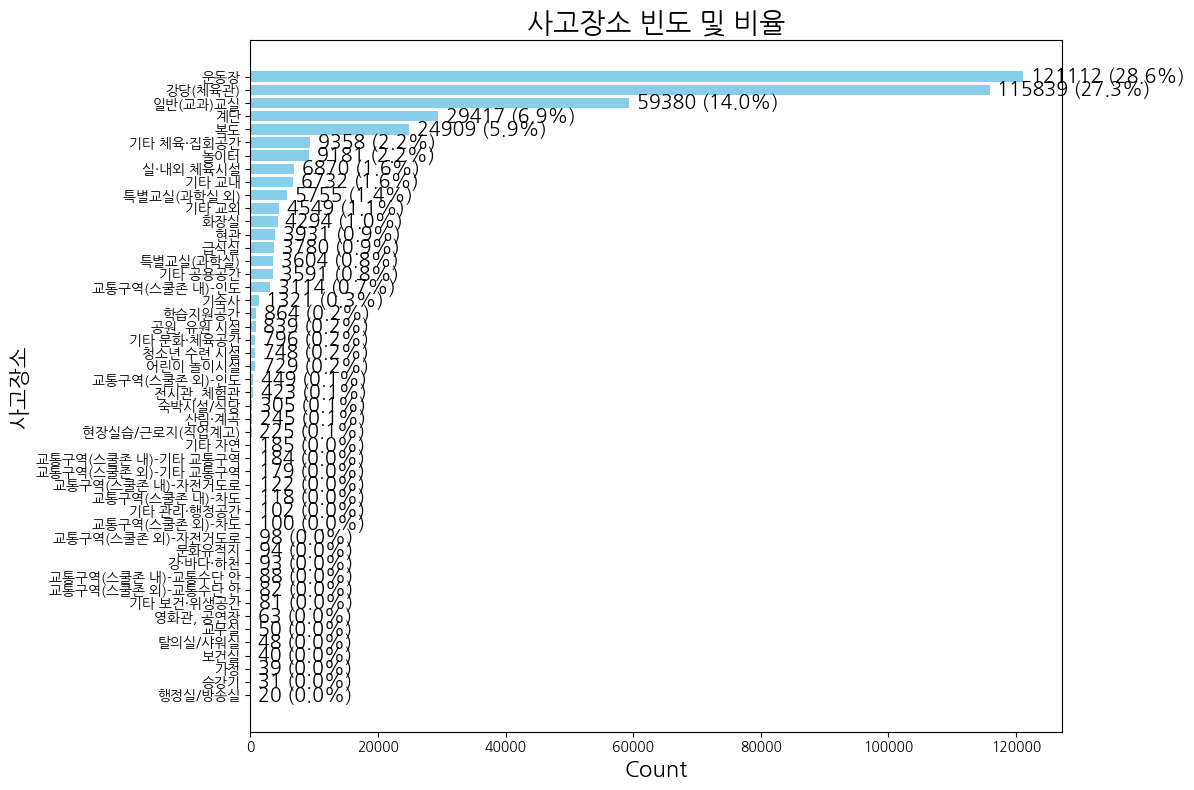

In [10]:
plotting_bar(data, '사고장소')

- 사고장소: 사고시간 분석과 유사하게 체육시간에 쓰이는 강당, 운동장 그리고 쉬는시간, 식사시간에 포함되는 교실, 계단 및 복도가 큼

### 사고형태

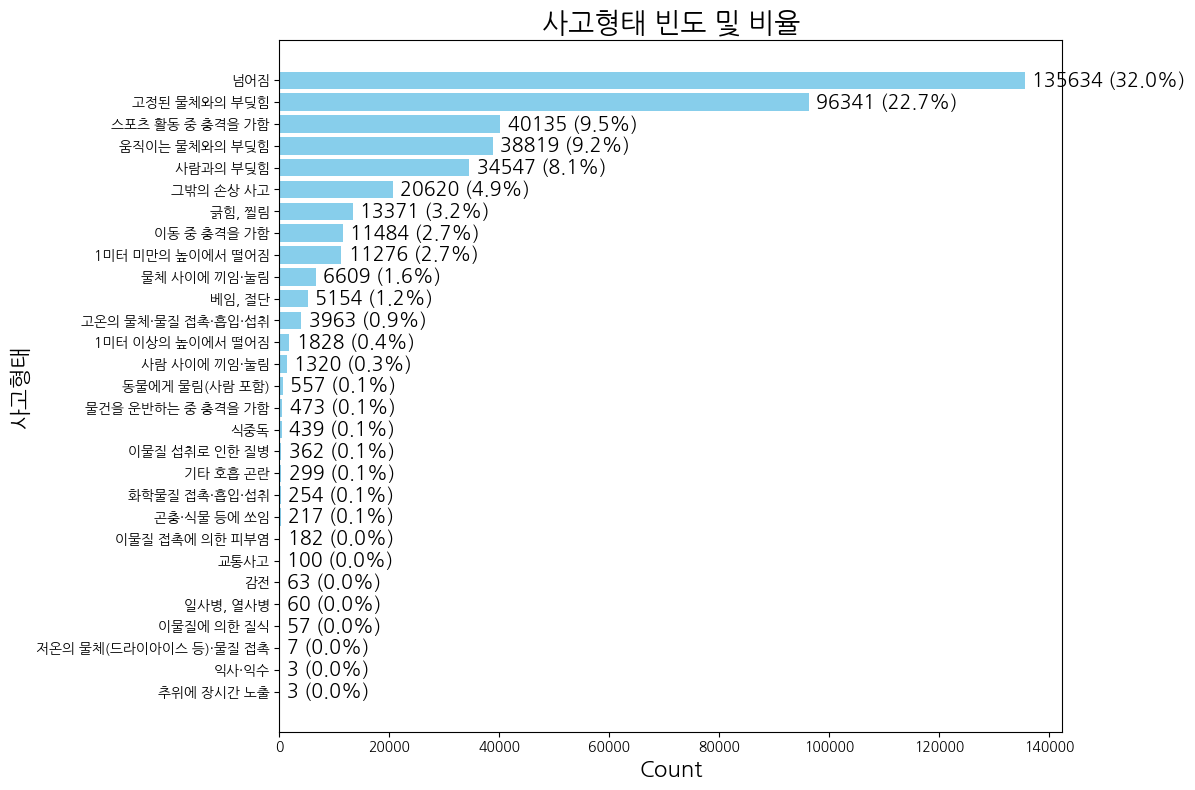

In [11]:
plotting_bar(data, '사고형태')

- 사고형태: 대부분의 형태가 넘어짐 + 부딪힘

### 사고당시활동

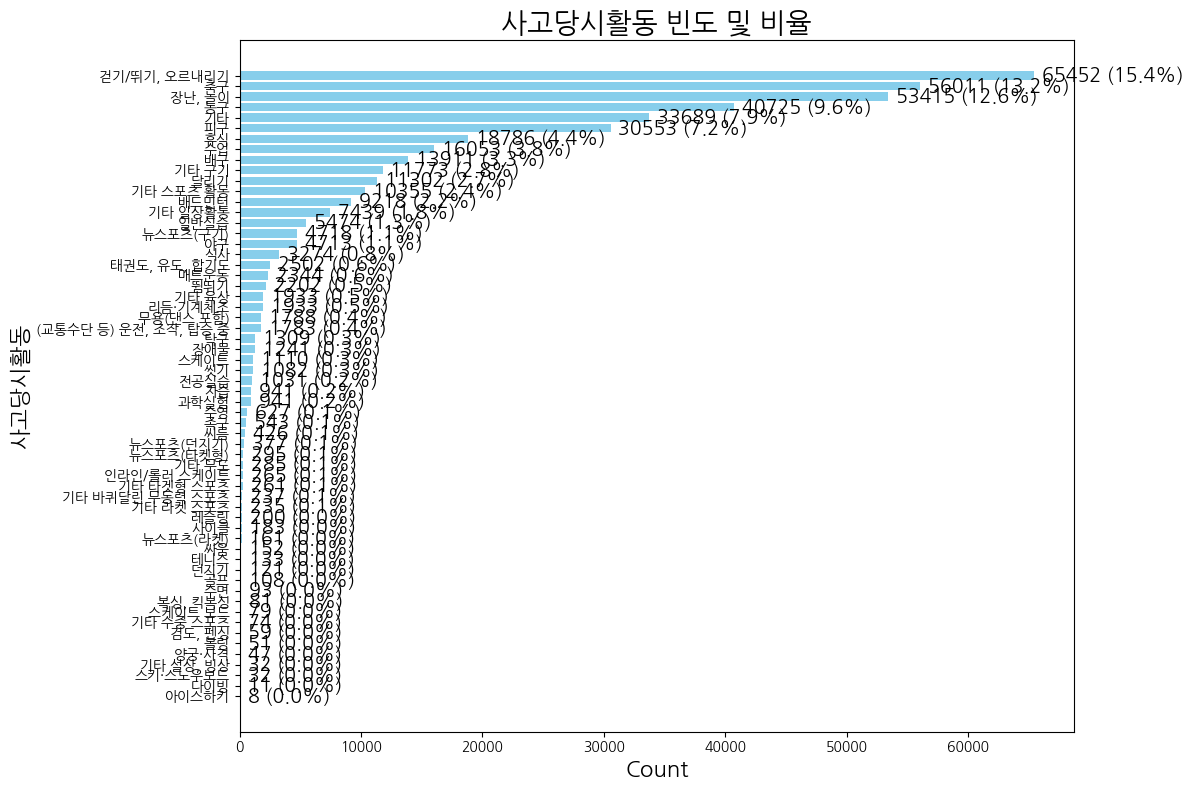

In [12]:
plotting_bar(data, '사고당시활동')

- 사고당시활동: 흔한 일들인 걷기/뛰기/오르내리기와 장난. 축구/농구/피구와 같은 다칠 가능성이 높은 체육활동들

### 사고부위

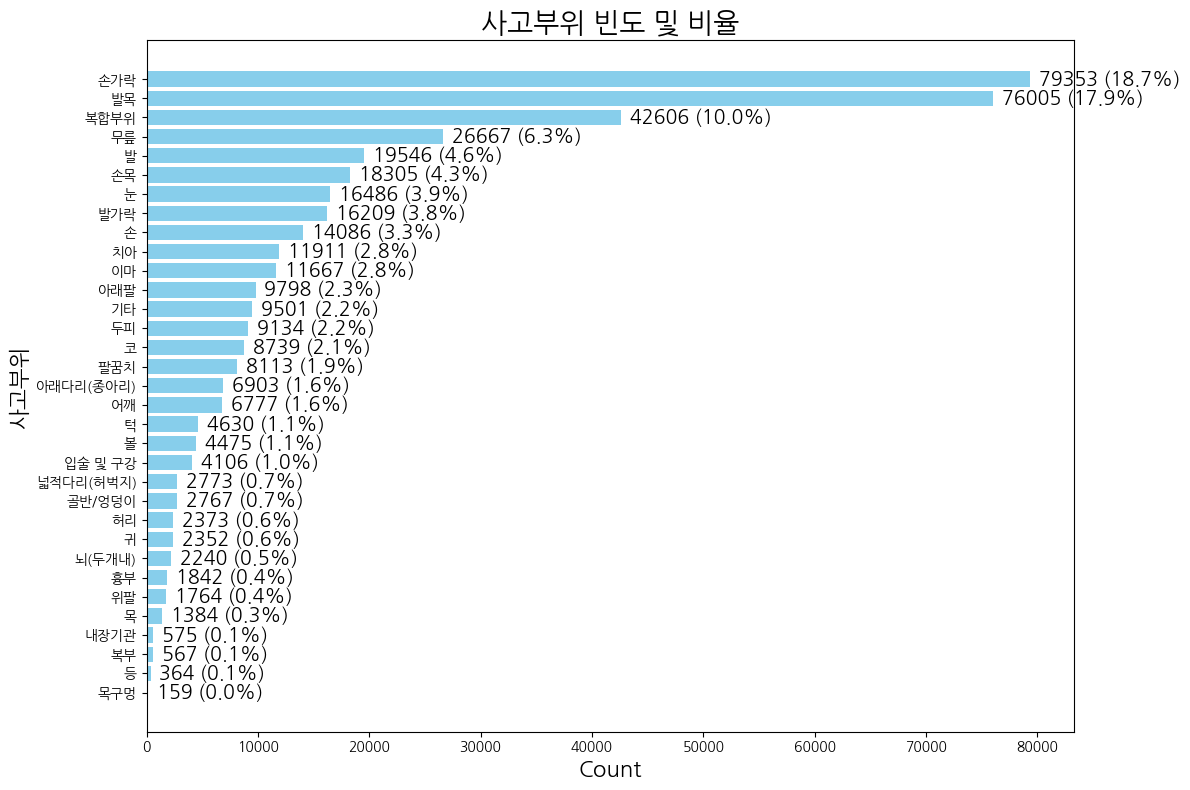

In [13]:
plotting_bar(data, '사고부위')

- 사고부위: 대부분 넘어졌을 때 쉽게 다칠 수 있고, 공에 부딪혀 다칠수 있는 손가락, 발목, 우릎 눈, 손목 등
많이 사용하는 손과 발이 큰 비중 차지.

### 보상급여

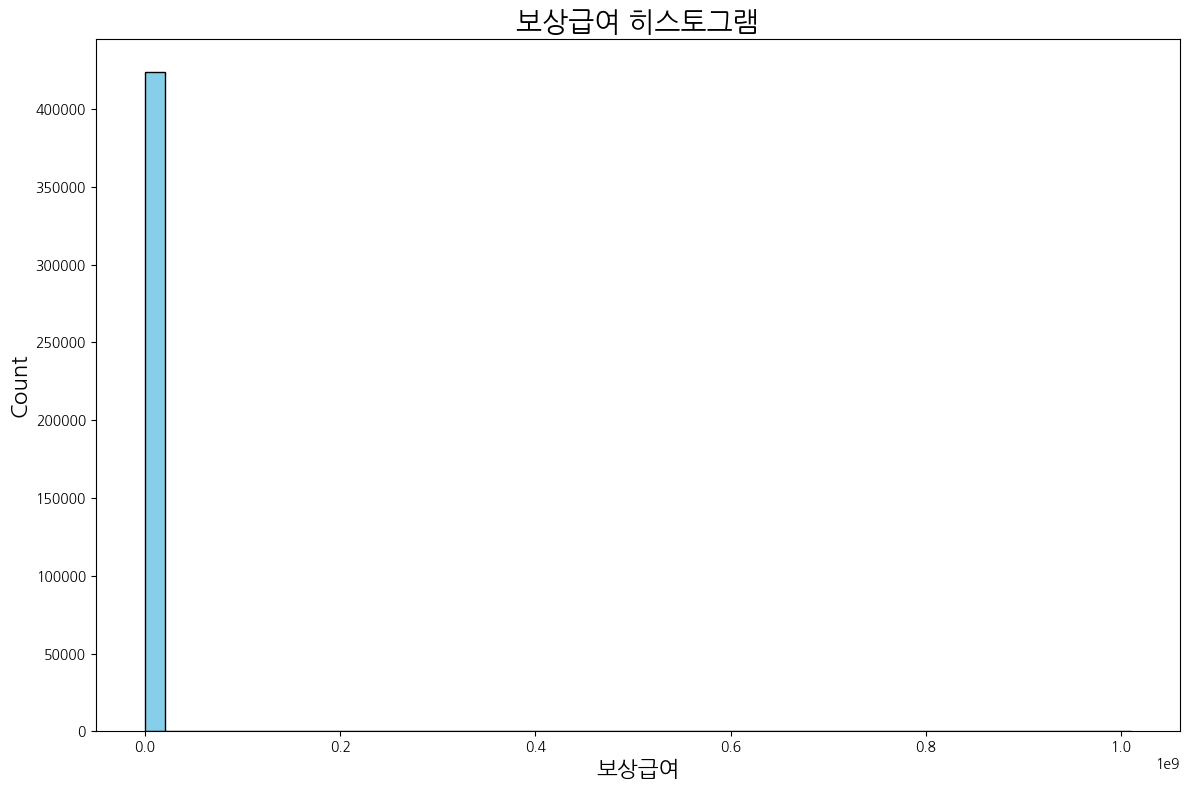

In [14]:
plotting_hist(data, '보상급여')

- 대부분이 0원에 포함됨. 크지는 않지만 자잘한 사고가 많이 이루어짐을 확인.
- 확대해서 확인해보자

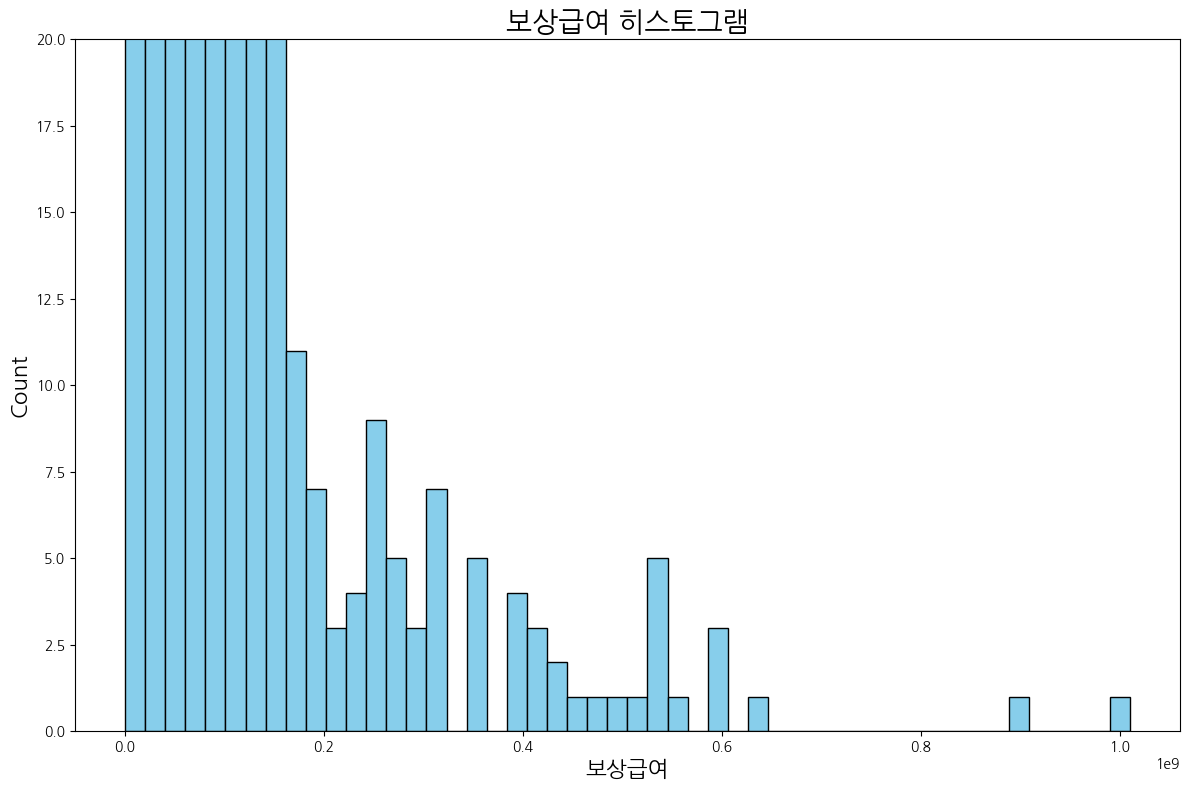

In [15]:
plotting_hist(data, '보상급여', 0, 20)

- 일정 금액 이상(0.6*1e9 이상은 특이 케이스로 빈도가 크지 않음)

In [16]:
count = (data['보상급여'] < 20_000_000).sum()
print(f"보상급여가 2천만 미만인 행의 개수: {count:,}개")


보상급여가 2천만 미만인 행의 개수: 423,619개


# 종합
- 사고 파일 분석과 거의 유사
    - 한참 혈기왕성할 초중학생, 저학년, 남자가 사고율이 높음
    - 체육/식사/쉬는 시간에 뛰거나 장난 혹은 체육활동 시에 사고가 대부분을 차지함(약 60~70%)
    - 공에 의한 사고, 넘어지고 부딪히는 사고가 주로 발생
    - 이로인해 손, 발, 눈이 다치는 사고가 발생

- 보상 파일 분석
    - 보상 금액에 대한 추가 데이터가 존재
    - 데이터를 보았을 때 2천만원 미만인 데이터가 약 99%차지.

# 상관관계 확인

일반학생이 대부분이 '사고자 구분' 항목은 너무 편향되어 있어 상관을 보기 어렵다고 판단. 제거

interval columns not set, guessing: ['보상급여']


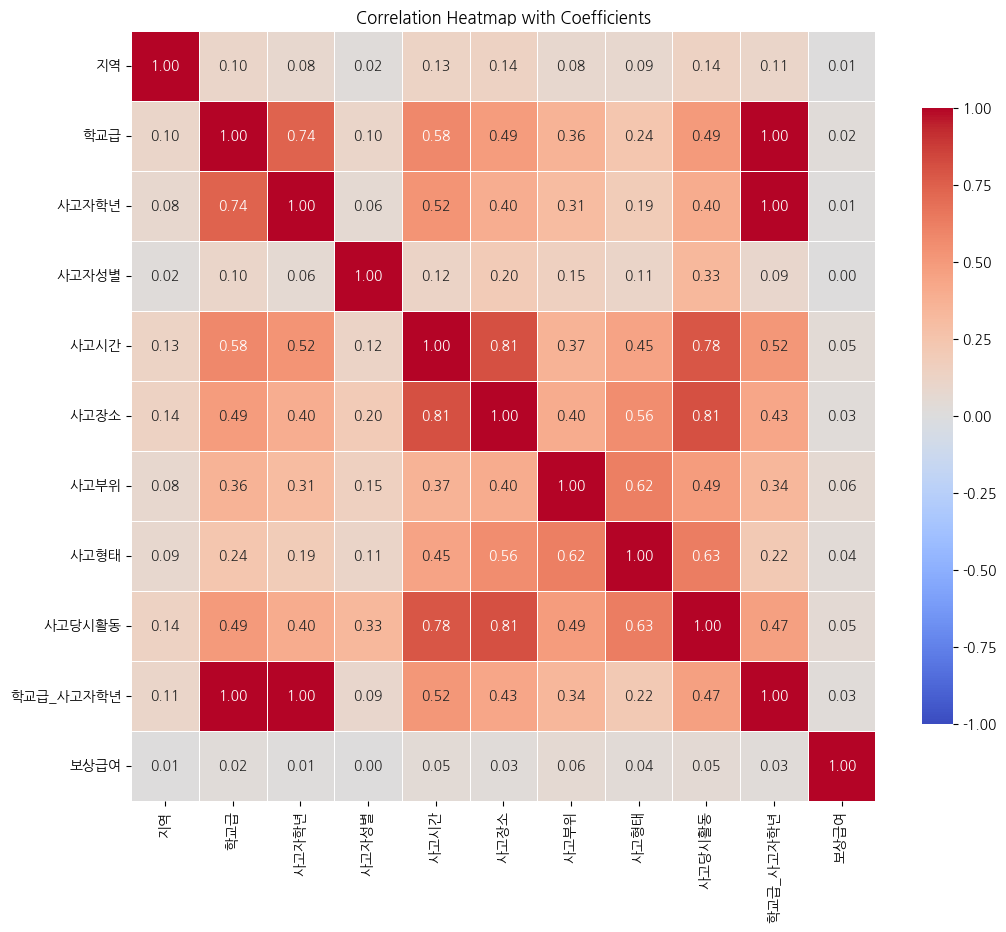

In [17]:
import phik
from phik import resources, report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_for_cor = data.drop(columns=['사고자구분'], inplace = False)
cor_matrix = data_for_cor.phik_matrix()

plt.figure(figsize=(12, 10))
sns.heatmap(
    cor_matrix,
    annot=True,            # 상관계수 표시
    fmt=".2f",             # 소수점 2자리
    cmap="coolwarm",       # 색상맵
    vmin=-1, vmax=1,       # 상관계수 범위
    linewidths=0.5,        # 셀 간격
    cbar_kws={"shrink": .8} # colorbar 크기 조절
)
plt.title("Correlation Heatmap with Coefficients")
plt.show()

- 사고자 학년, 학교급, 추정나이 상관: 추정나이 자체가 이들의 파생 변수라 높은 상관은 당연한 결과
- 사고 시간, 사고 장소, 사고형태, 사고당시활동, 사고 부위: 학교 특성상 정해진 시간에 정해진 장소에 있을 가능성이 높고 장소에 따라 당시에 무엇을 했는지, 어떤 사고인지, 그래서 어딜 다쳤는지 유추할 수 있음

- 궁금한 것은 학교급/사고자학년/추정나이가 사고시간/장소/부위/당시활동/형태와 왜 상관이 높을까?라는 의문

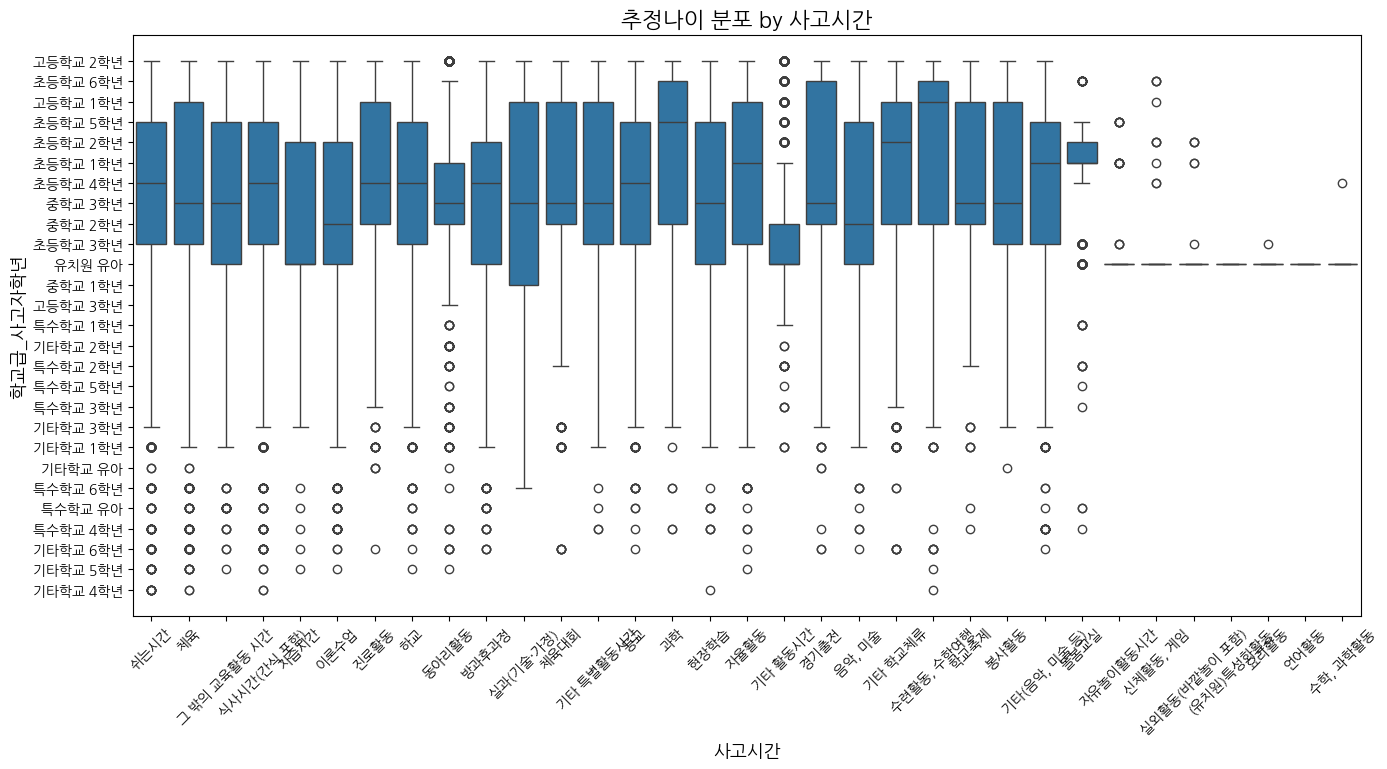

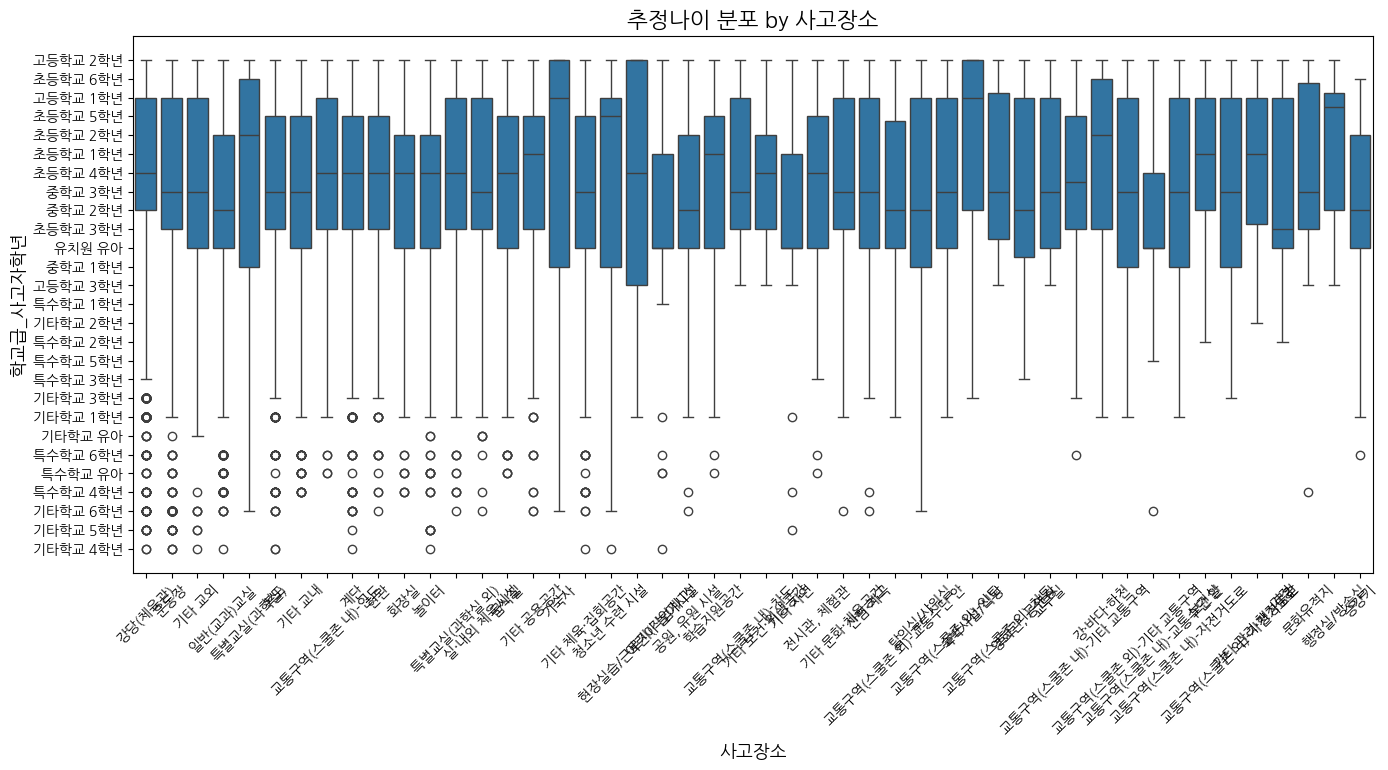

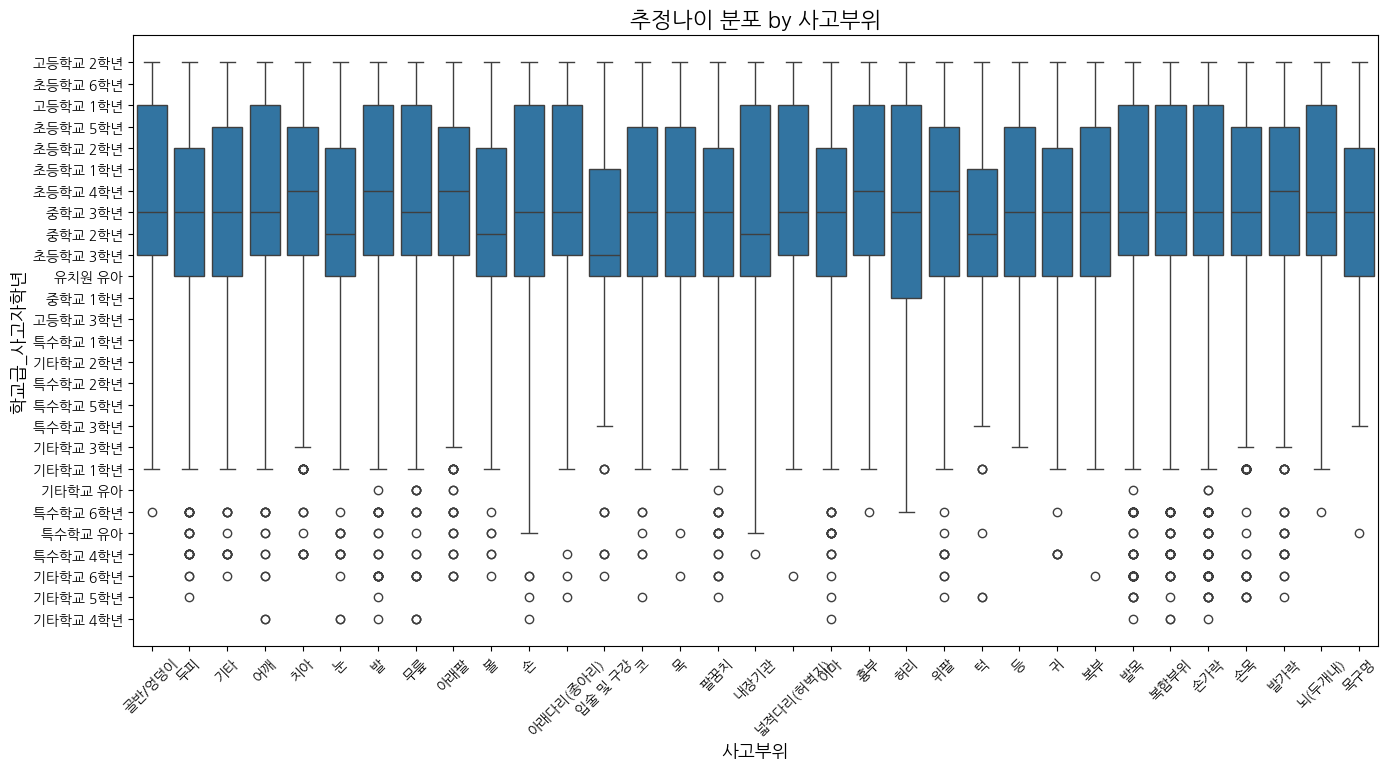

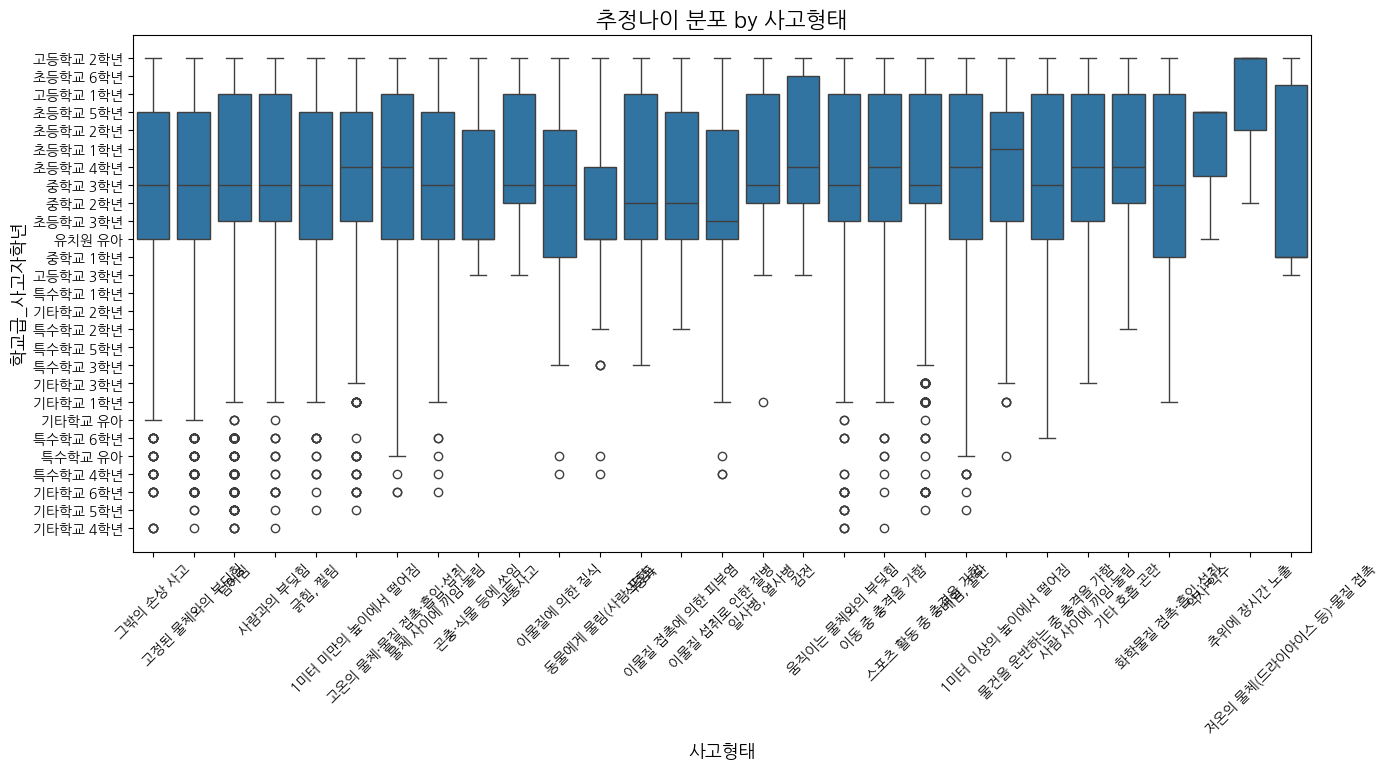

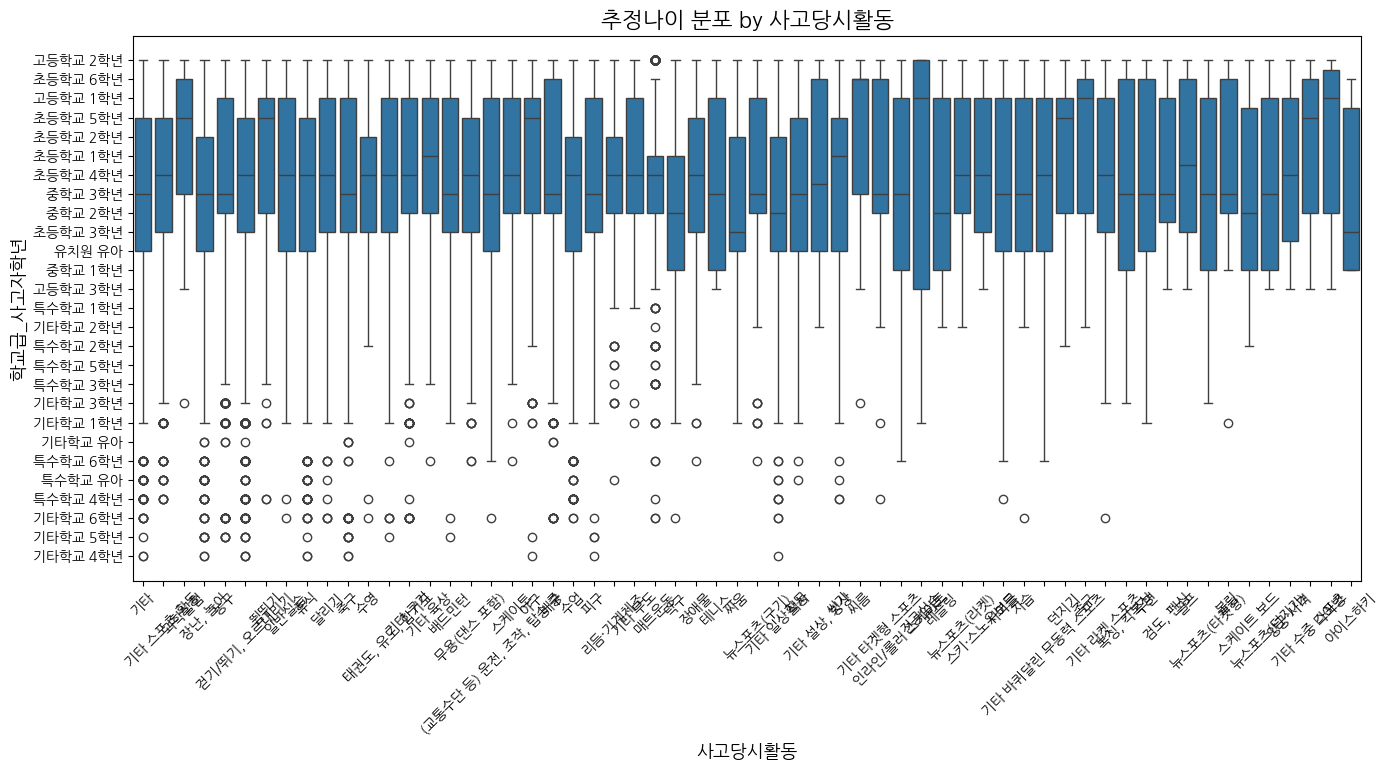

In [18]:
cat_cols = ['사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동']


manual_order = [
    '유치원 유아',
    '초등학교 1학년', '초등학교 2학년', '초등학교 3학년', '초등학교 4학년', '초등학교 5학년', '초등학교 6학년',
    '중학교 1학년', '중학교 2학년', '중학교 3학년',
    '고등학교 1학년', '고등학교 2학년', '고등학교 3학년',
    '특수학교 유아', '특수학교 1학년', '특수학교 2학년', '특수학교 3학년', '특수학교 4학년', '특수학교 5학년', '특수학교 6학년',
    '기타학교 1학년', '기타학교 2학년', '기타학교 3학년', '기타학교 4학년', '기타학교 5학년', '기타학교 6학년'
]


for col in cat_cols:
    plt.figure(figsize=(14, max(6, len(manual_order)*0.3)))
    sns.boxplot(
        x=data[col],
        y=data['학교급_사고자학년'],
        # order=manual_order  # 네가 수동 작성한 순서
    )
    plt.title(f"추정나이 분포 by {col}", fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('학교급_사고자학년', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.tight_layout()
    plt.show()

- plot을 볼 때 대부분의 추정나이는 10~17세에 몰려있기 때문에 phik 기반의 binning 기법 상관은 이를 과대 추정한 것 같다.

## 학교급, 학년 구분 분석

- 추정나이가 아닌 학교급과 학년에 따라 구분하여 분석

In [19]:
def cross_tab_top3(df, col1, col2):
    import pandas as pd
    import matplotlib.pyplot as plt

    cross_tab = pd.crosstab(df[col1], df[col2], normalize='index')

    # 1️⃣ 각 그룹별 top3 범주 구한 뒤 union
    top_categories_set = set()
    for bar_cat in cross_tab.index:
        group_row = cross_tab.loc[bar_cat]
        top3_categories = group_row.sort_values(ascending=False).head(3).index.tolist()
        top_categories_set.update(top3_categories)

    top_categories_list = list(top_categories_set)

    # 2️⃣ '학교급'일 때만 순서 적용
    if col1 == '학교급':
        school_order = ['초등학교', '중학교', '고등학교', '특수학교', '유치원', '기타학교']
        available_labels = [label for label in school_order if label in cross_tab.index]
        cross_tab = cross_tab.loc[available_labels]

    # 3️⃣ Stacked Bar Chart
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

    # 4️⃣ Legend를 top_categories_list만 표시
    handles, labels = ax.get_legend_handles_labels()
    label_to_handle = dict(zip(labels, handles))

    filtered_handles = [label_to_handle[label] for label in labels if label in top_categories_list]
    filtered_labels = [label for label in labels if label in top_categories_list]

    ax.legend(filtered_handles, filtered_labels, title=col2, bbox_to_anchor=(1.05, 1))

    # 5️⃣ Annotate는 각 그룹별 top3만 표시
    for idx, bar_cat in enumerate(cross_tab.index):
        group_row = cross_tab.loc[bar_cat]
        top3_categories = group_row.sort_values(ascending=False).head(3).index.tolist()

        y_offset = 0
        for cat in cross_tab.columns:
            val = group_row[cat]
            if val > 0.01 and cat in top3_categories:
                ax.text(idx,
                        y_offset + val / 2,
                        f"{val*100:.1f}%",
                        ha='center', va='center',
                        fontsize=9, color='black')
            y_offset += val

    plt.ylabel('Proportion')
    plt.title(f'Stacked Bar Chart: Group-wise Top 3 Annot, Filtered Legend ({col1} vs {col2})')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


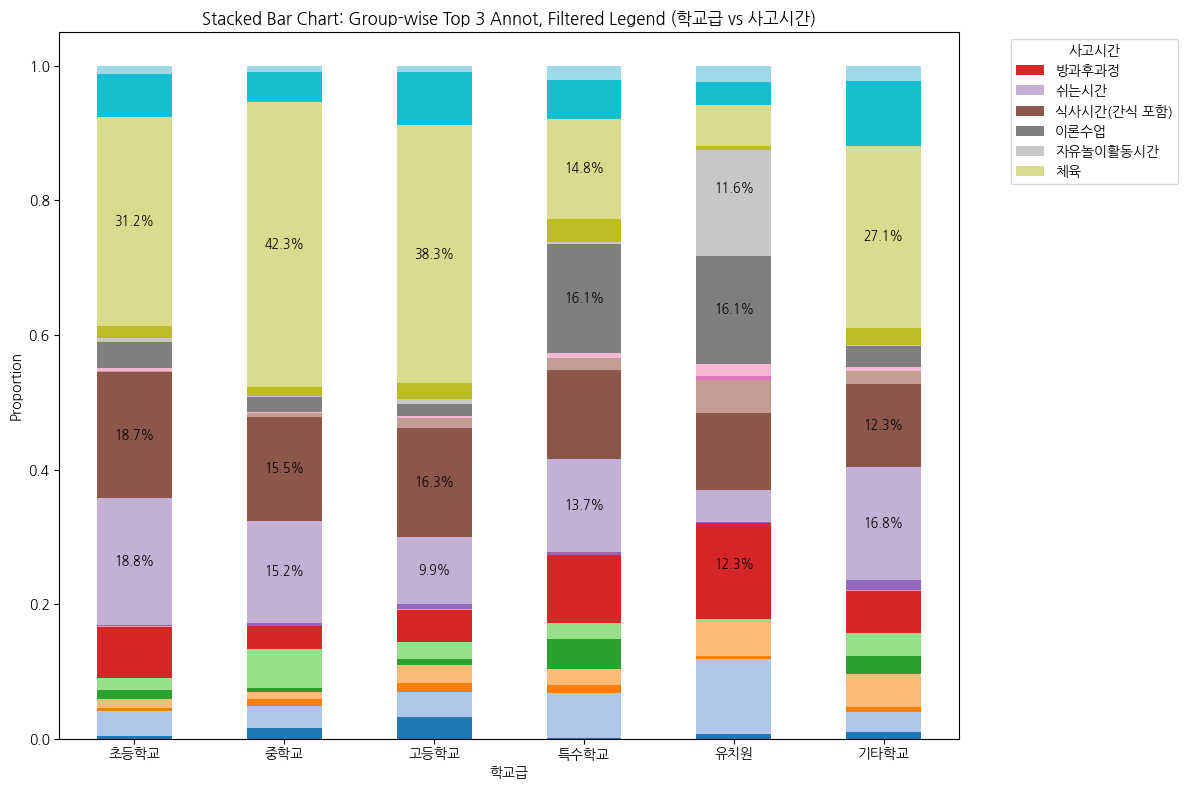

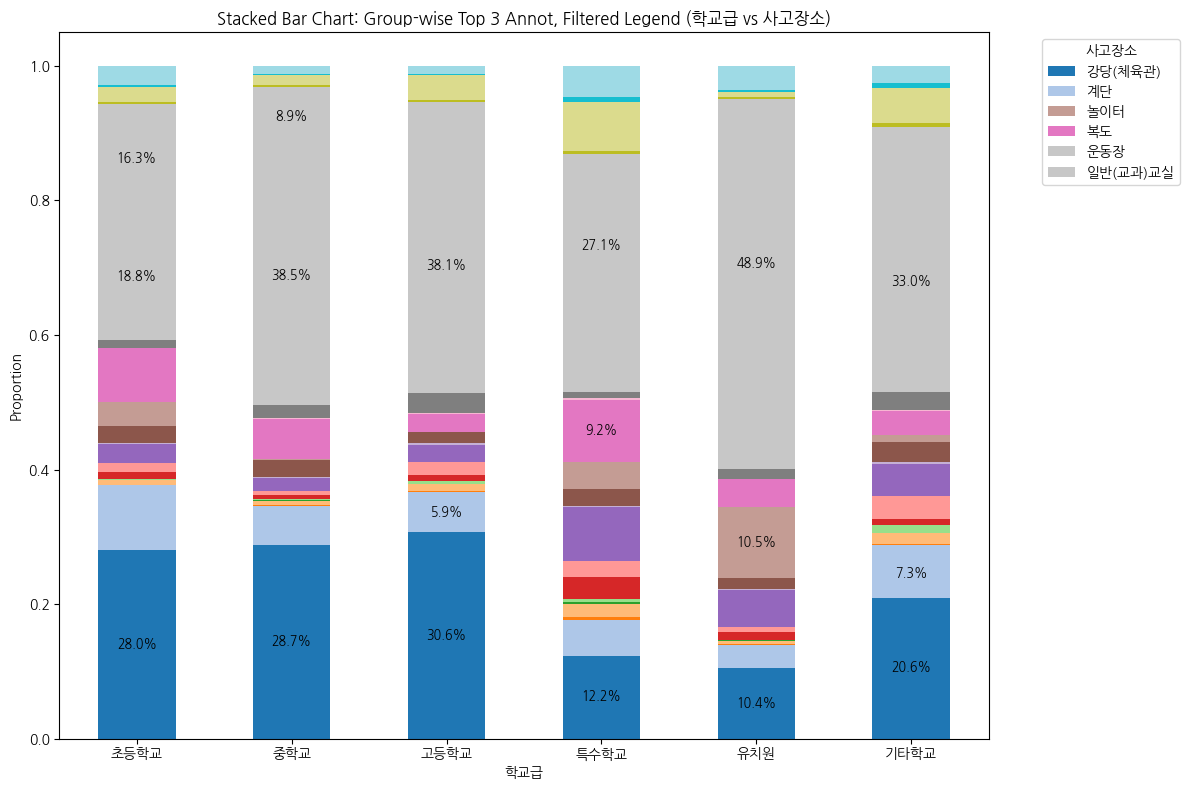

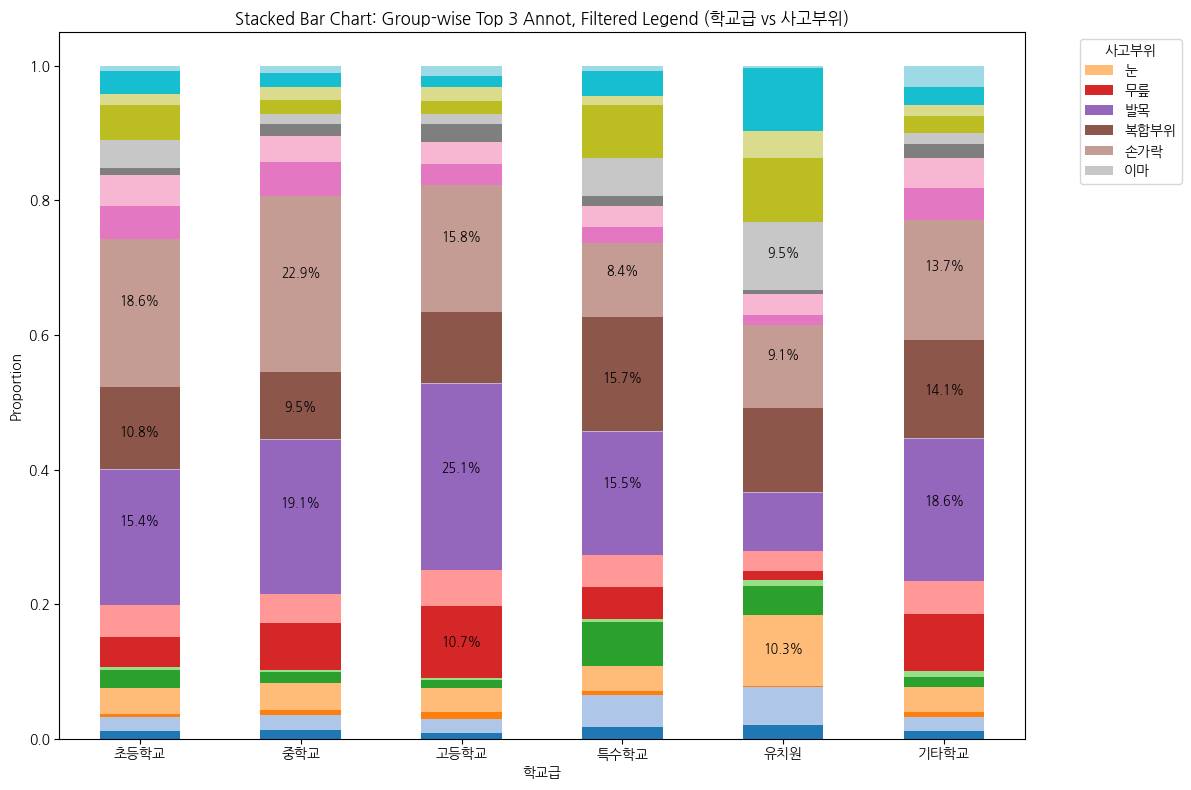

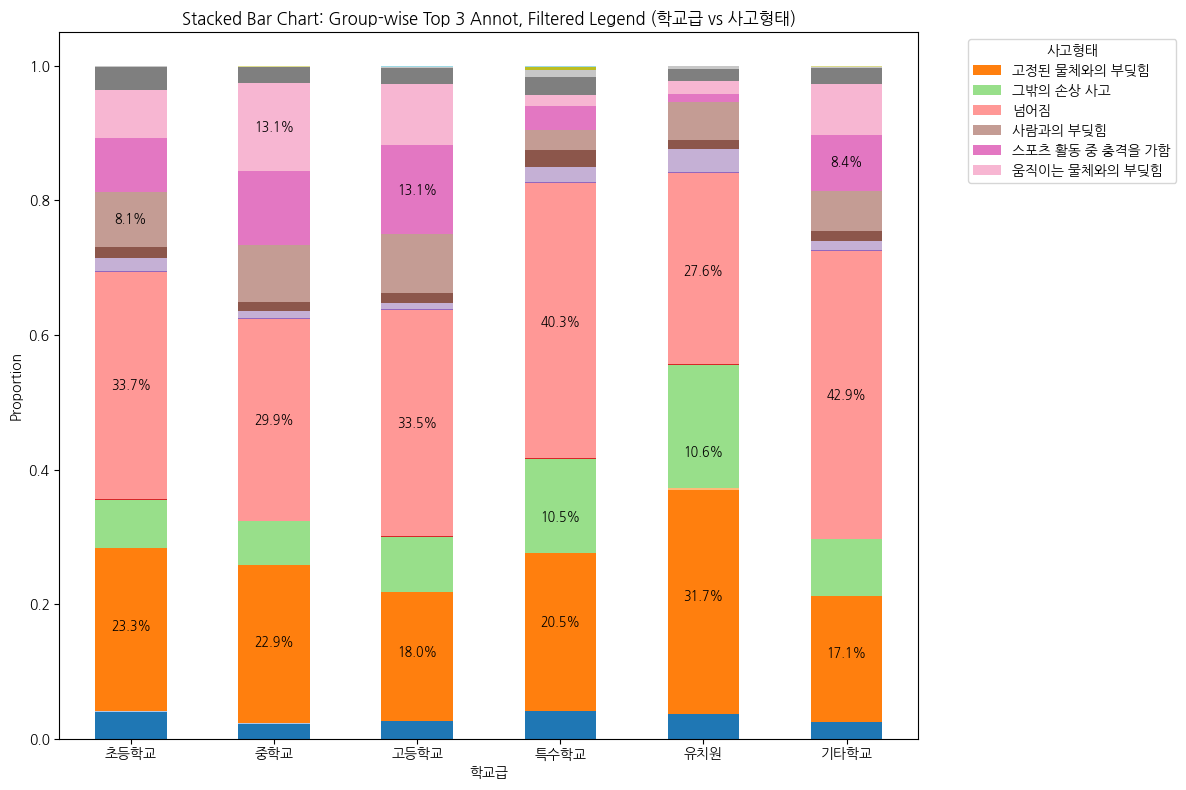

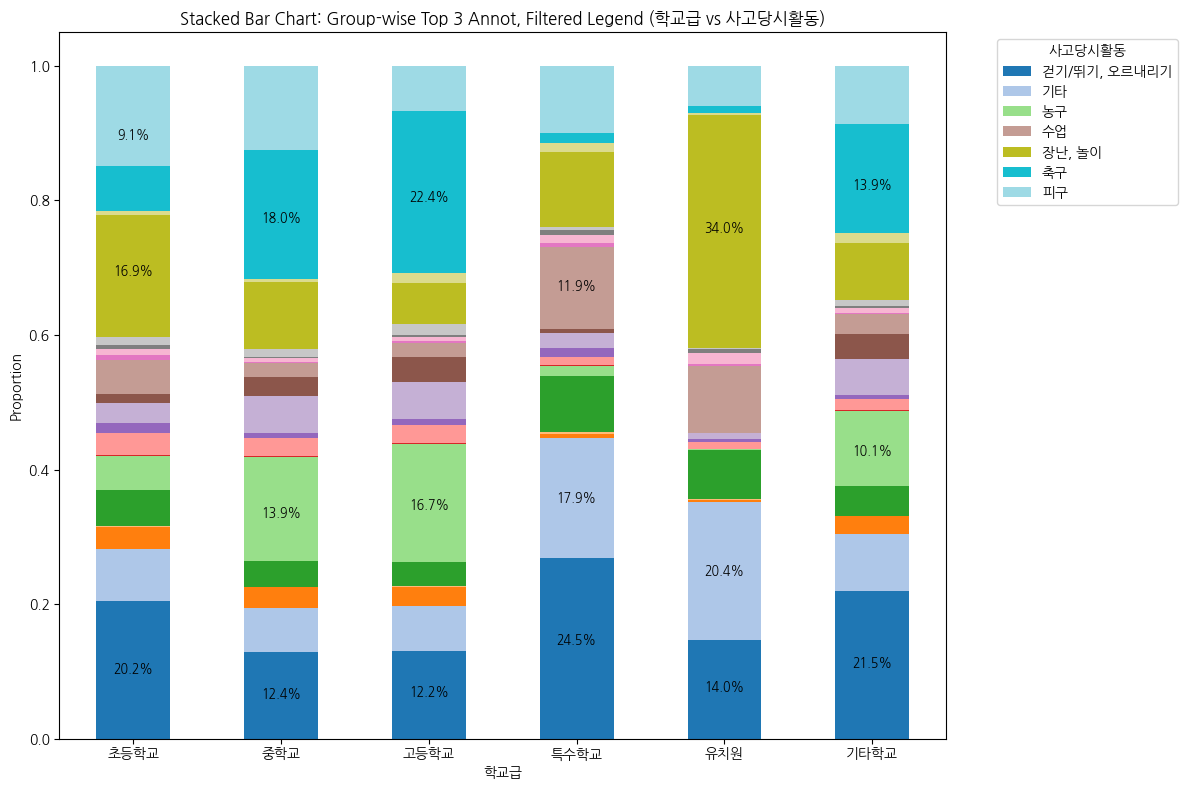

In [20]:
for i in cat_cols:
    cross_tab_top3(data, '학교급', i)

- 학교급의 경우 유치원생을 제외하고는 모두 비슷한 분포를 보임

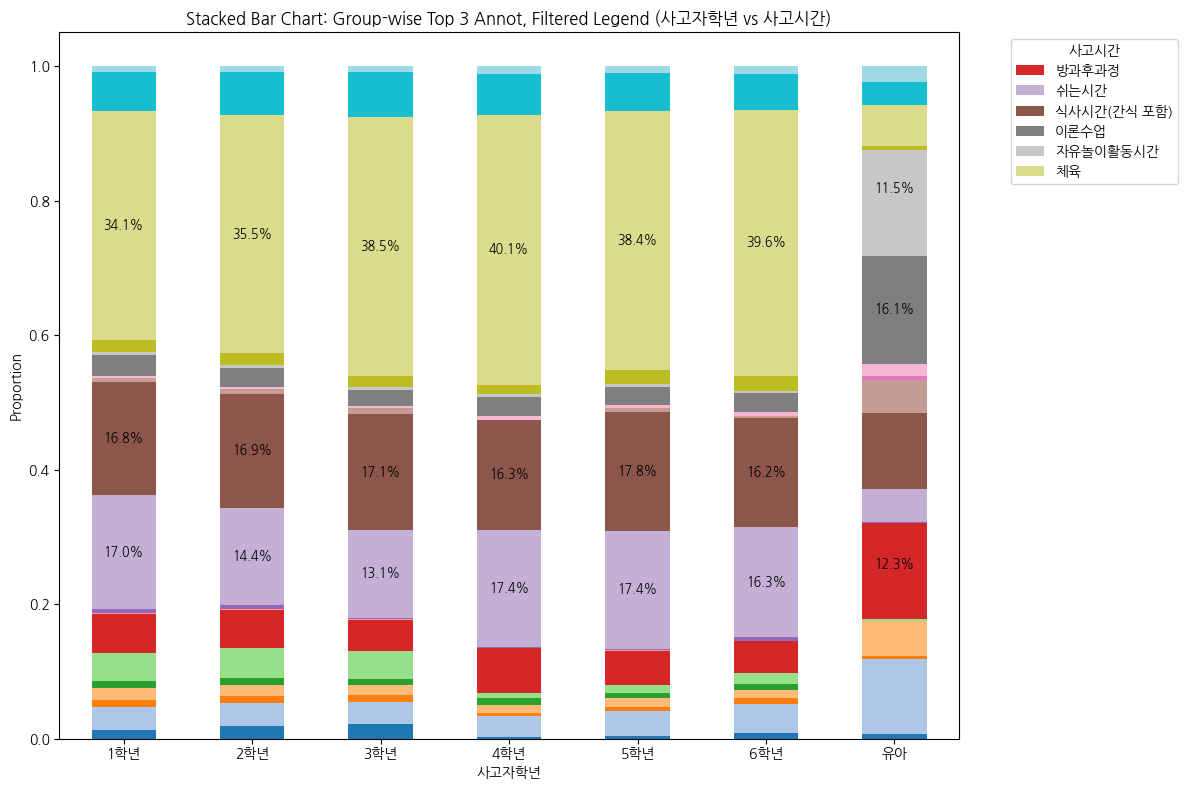

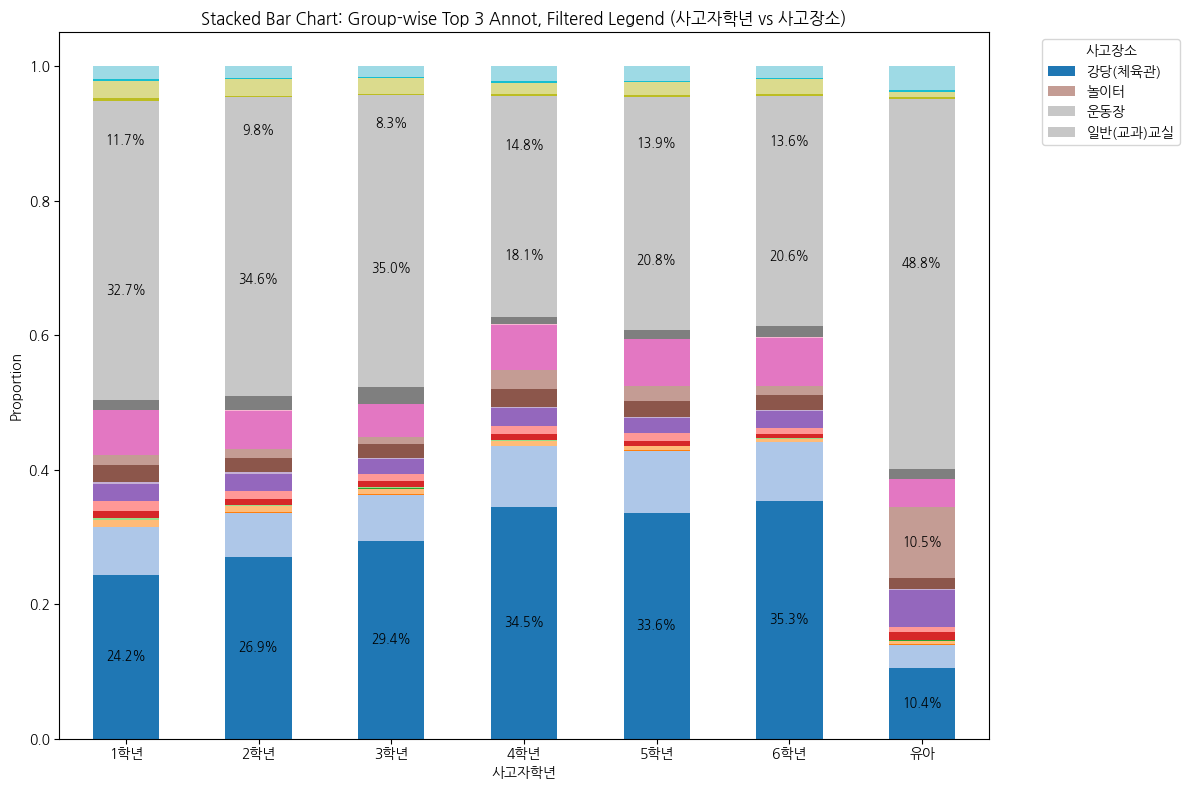

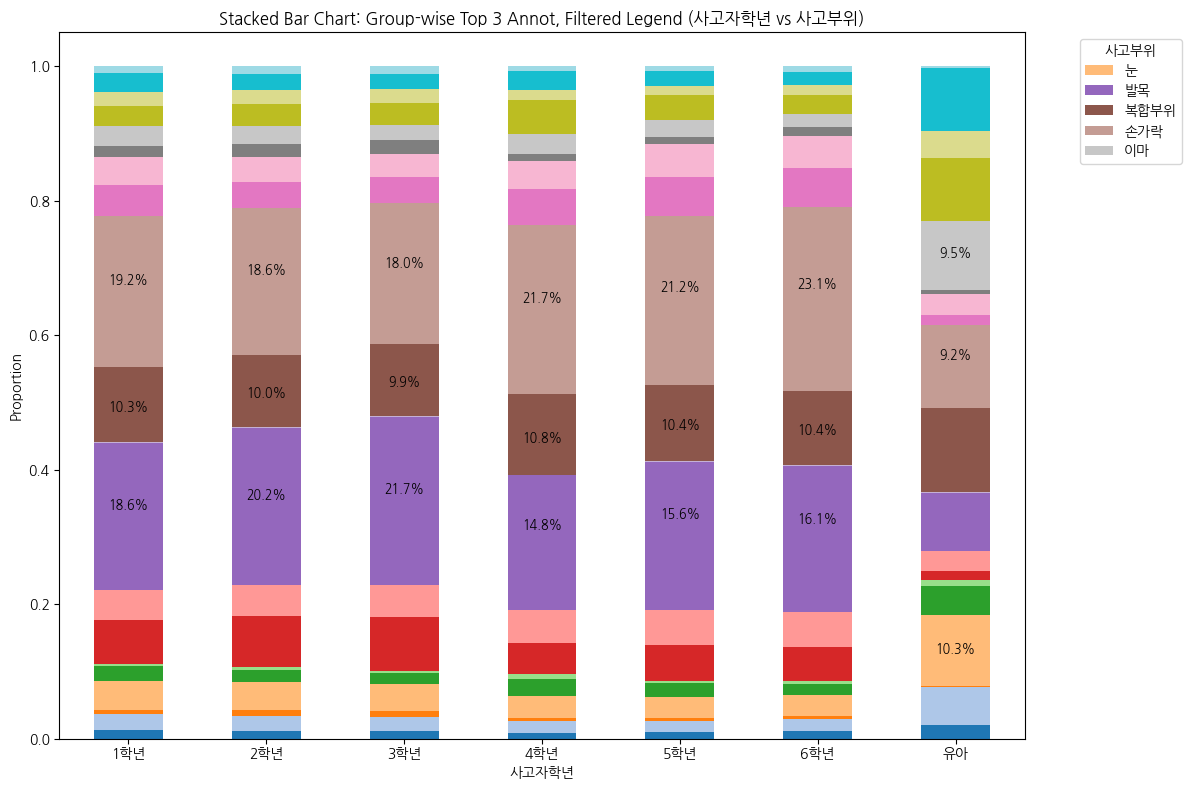

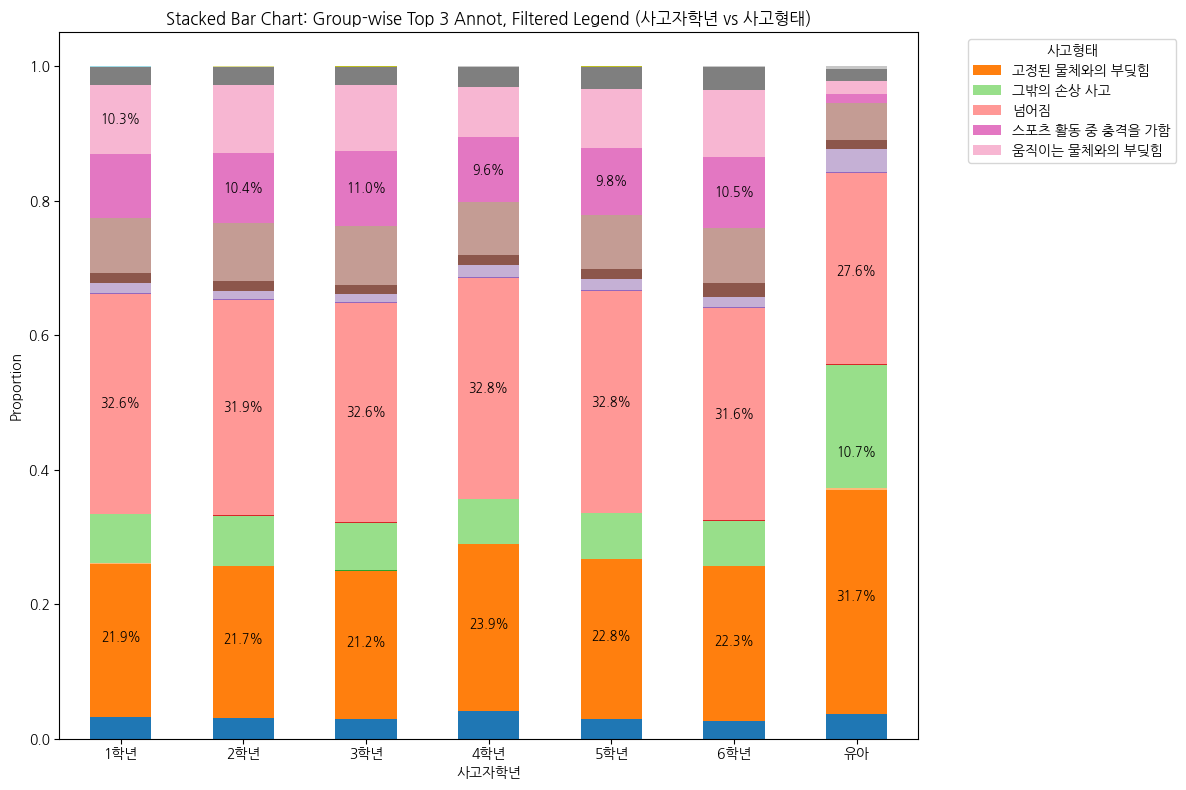

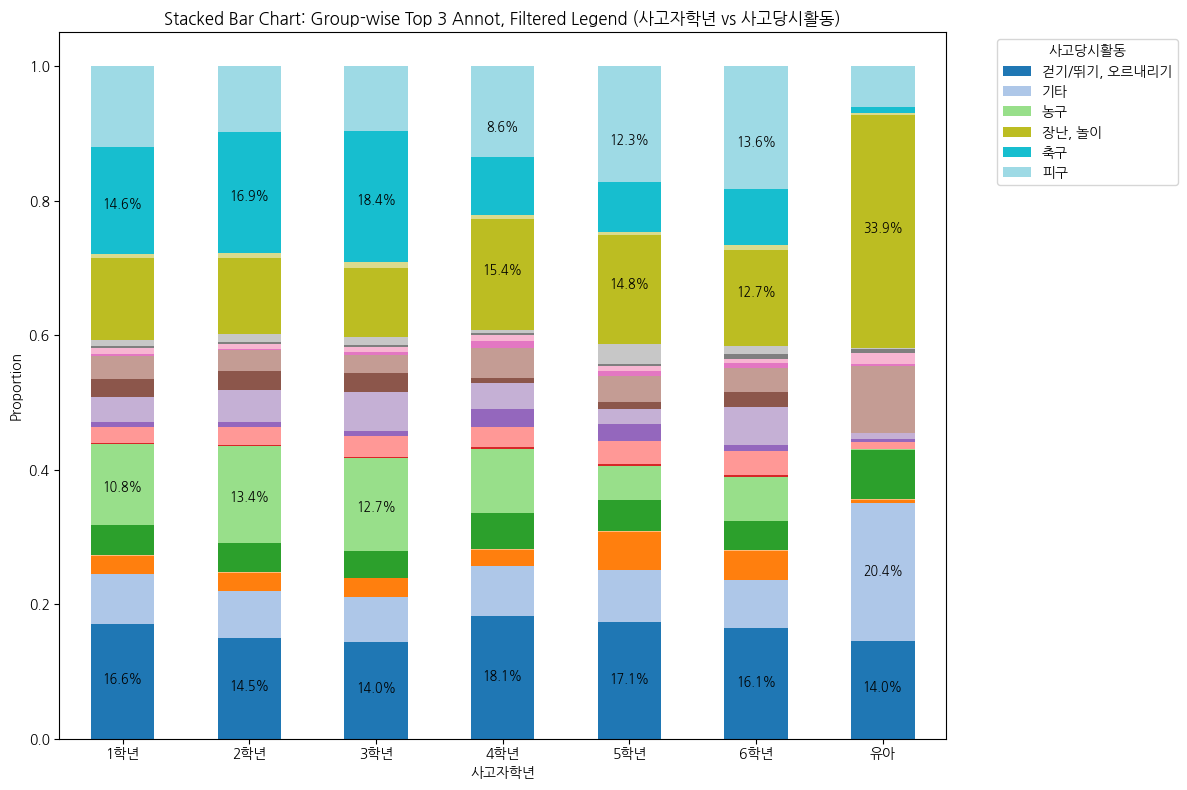

In [21]:
for i in cat_cols:
    cross_tab_top3(data, '사고자학년', i)

- 사고자학년 또한 유치원생을 제외하고 모두 비슷한 분포를 보이지만 결국 사고형태는 넘어짐이 제일큼

- 종합
  - 상관 결과 일반적으로 상관이 있을 것이라는 요인들은 실제로 상관이 존재
  - 외 학년, 학교급, 추정나이의 경우 범주형 변수의 특성 상 상관이 높게 생긴 것으로 확인
    - 단, 실제로 학교급/사고자학년에서 유치원생의 요인이 크게 다르다는 것은 사실
   

In [62]:
from scipy.spatial.distance import cosine, euclidean
from scipy.spatial import distance

# 범주형 변수
col = '사고당시활동'

# 초중고, 유치원, 특수학교 데이터 분리
초중고 = data[data['학교급'].isin(['초등학교','중학교','고등학교'])]
유치원 = data[data['학교급'] == '유치원']
특수학교 = data[data['학교급'] == '특수학교']

for i in cat_cols:
    # 비율 구하기
    초중고_ratio = 초중고[i].value_counts(normalize=True).sort_index()
    유치원_ratio = 유치원[i].value_counts(normalize=True).sort_index()
    특수학교_ratio = 특수학교[i].value_counts(normalize=True).sort_index()
    
    # 인덱스 맞추기
    idx = 초중고_ratio.index.union(유치원_ratio.index).union(특수학교_ratio.index)
    초중고_ratio = 초중고_ratio.reindex(idx, fill_value=0)
    유치원_ratio = 유치원_ratio.reindex(idx, fill_value=0)
    특수학교_ratio = 특수학교_ratio.reindex(idx, fill_value=0)
    
    # Cosine Similarity
    sim_유치원 = 1 - cosine(특수학교_ratio, 유치원_ratio)
    sim_초중고 = 1 - cosine(특수학교_ratio, 초중고_ratio)
    sim_result = "유치원" if sim_유치원 > sim_초중고 else "초중고"
    
    # Euclidean Distance
    dist_유치원 = euclidean(특수학교_ratio, 유치원_ratio)
    dist_초중고 = euclidean(특수학교_ratio, 초중고_ratio)
    dist_result = "유치원" if dist_유치원 < dist_초중고 else "초중고"
    
    # JS Divergence
    js_유치원 = distance.jensenshannon(특수학교_ratio, 유치원_ratio)
    js_초중고 = distance.jensenshannon(특수학교_ratio, 초중고_ratio)
    js_result = "유치원" if js_유치원 < js_초중고 else "초중고"

    print(f"[{i}]")
    print(f"✅ Cosine Similarity (유치원): {sim_유치원:.4f}")
    print(f"✅ Cosine Similarity (초중고): {sim_초중고:.4f}")
    #print(f"→ Cosine 기준, 특수학교는 '{sim_result}'에 더 가까움\n")
    
    print(f"✅ Euclidean Distance (유치원): {dist_유치원:.4f}")
    print(f"✅ Euclidean Distance (초중고): {dist_초중고:.4f}")
    #print(f"→ Euclidean 기준, 특수학교는 '{dist_result}'에 더 가까움\n")
    
    print(f"✅ JS Divergence (유치원): {js_유치원:.4f}")
    print(f"✅ JS Divergence (초중고): {js_초중고:.4f}")
    #print(f"→ JS Divergence 기준, 특수학교는 '{js_result}'에 더 가까움")
    print("-" * 50 + "\n")


[사고시간]
✅ Cosine Similarity (유치원): 0.7274
✅ Cosine Similarity (초중고): 0.7935
✅ Euclidean Distance (유치원): 0.2274
✅ Euclidean Distance (초중고): 0.2717
✅ JS Divergence (유치원): 0.4191
✅ JS Divergence (초중고): 0.2906
--------------------------------------------------

[사고장소]
✅ Cosine Similarity (유치원): 0.9164
✅ Cosine Similarity (초중고): 0.6730
✅ Euclidean Distance (유치원): 0.2459
✅ Euclidean Distance (초중고): 0.3333
✅ JS Divergence (유치원): 0.2634
✅ JS Divergence (초중고): 0.3254
--------------------------------------------------

[사고부위]
✅ Cosine Similarity (유치원): 0.7833
✅ Cosine Similarity (초중고): 0.8820
✅ Euclidean Distance (유치원): 0.1739
✅ Euclidean Distance (초중고): 0.1501
✅ JS Divergence (유치원): 0.2590
✅ JS Divergence (초중고): 0.2023
--------------------------------------------------

[사고형태]
✅ Cosine Similarity (유치원): 0.9252
✅ Cosine Similarity (초중고): 0.9420
✅ Euclidean Distance (유치원): 0.1798
✅ Euclidean Distance (초중고): 0.1595
✅ JS Divergence (유치원): 0.1699
✅ JS Divergence (초중고): 0.2259
------------------------

- 사고 장소에서 모든 지표가 특수학교는 유치원과 가까운 분포를 가진다고 나타내고 있음

- 아래는 사고 장소의 각 변수의 비율을 시각화한 것으로 특수학교의 분포가 실제로 유치원과 더 가까움을 확인
    - 히트맵, 그래프에서 모두 특수학교의 분포 모양이 유치원과 더 유사하다

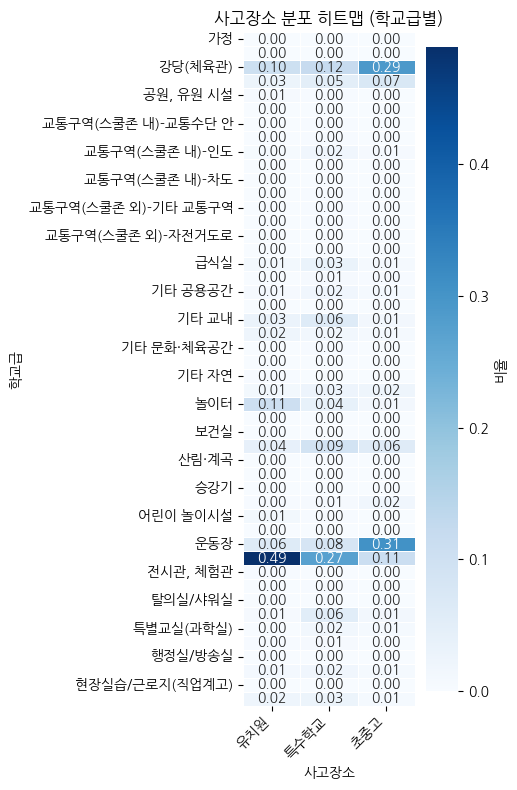

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 사고장소 비율 계산
col = '사고장소'
초중고_ratio = 초중고[col].value_counts(normalize=True).sort_index()
유치원_ratio = 유치원[col].value_counts(normalize=True).sort_index()
특수_ratio = 특수학교[col].value_counts(normalize=True).sort_index()

# 인덱스 통일
idx = 초중고_ratio.index.union(유치원_ratio.index).union(특수_ratio.index)
초중고_ratio = 초중고_ratio.reindex(idx, fill_value=0)
유치원_ratio = 유치원_ratio.reindex(idx, fill_value=0)
특수_ratio = 특수_ratio.reindex(idx, fill_value=0)

# DataFrame 결합
df = pd.DataFrame({
    '유치원': 유치원_ratio,
    '특수학교': 특수_ratio,
    '초중고': 초중고_ratio,
})  # 전치해서 학교급이 행, 사고장소가 열

# 히트맵 시각화
plt.figure(figsize=(5, 8))
sns.heatmap(df, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, cbar_kws={'label': '비율'})
plt.title('사고장소 분포 히트맵 (학교급별)')
plt.xlabel('사고장소')
plt.ylabel('학교급')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


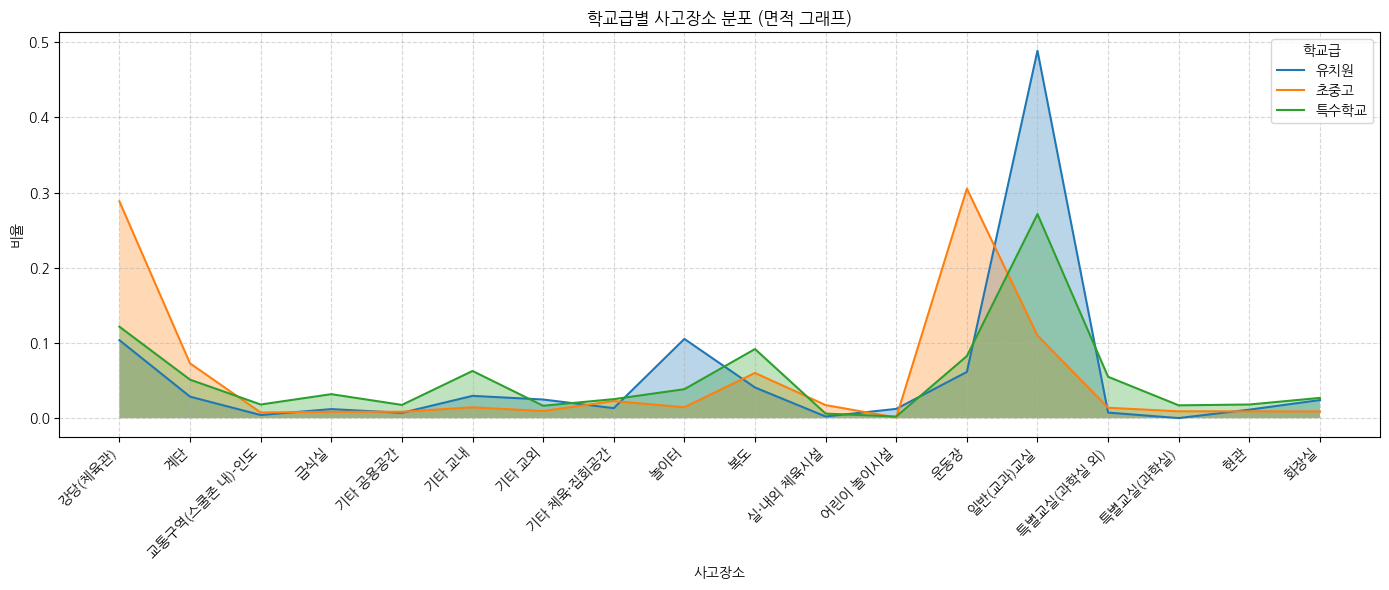

In [64]:
# 비율이 세 학교급에서 모두 0.1 이하인 것은 제거 하여 시각화 편하게 함

import matplotlib.pyplot as plt

# 전치된 선그래프용 데이터프레임: 학교급(행) x 사고장소(열)
df_line = df_vertical.T

# 세 학교급 모두에서 0인 열(사고장소) 제거
df_line_filtered = df_line.loc[~(df_line <= 0.01).all(axis=1), :]


plt.figure(figsize=(14, 6))

x = df_line_filtered.index

# 각 학교급에 대해 fill_between으로 면적 채우기
for group in df_line_filtered.columns:
    y = df_line_filtered[group]
    plt.plot(x, y, label=group)  # 선 그래프
    plt.fill_between(x, y, alpha=0.3)  # 색 채우기 (alpha=투명도)

plt.title('학교급별 사고장소 분포 (면적 그래프)')
plt.xlabel('사고장소')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')
plt.legend(title='학교급')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

